In [10]:
# 1. Leer el archivo
import pandas as pd

df = pd.read_csv('finalito.csv', sep=',')
df

,customer_id,product_id,periodo,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn,stock_final,cat1,cat2,cat3,brand,sku_size
0,10001,20001,201701,0.0,11.0,99.43861,99.43861,NaN,HC,ROPA LAVADO,Liquido,ARIEL,3000
1,10001,20001,201702,0.0,23.0,198.84365,198.84365,NaN,HC,ROPA LAVADO,Liquido,ARIEL,3000
2,10001,20001,201703,0.0,33.0,92.46537,92.46537,NaN,HC,ROPA LAVADO,Liquido,ARIEL,3000
3,10001,20001,201704,0.0,8.0,13.29728,13.29728,NaN,HC,ROPA LAVADO,Liquido,ARIEL,3000
4,10001,20001,201705,0.0,15.0,101.20711,101.00563,NaN,HC,ROPA LAVADO,Liquido,ARIEL,3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16978675,10637,21276,201908,NaN,NaN,NaN,NaN,1.08488,PC,PIEL1,Cara,NIVEA,140
16978676,10637,21276,201909,NaN,NaN,NaN,NaN,0.87622,PC,PIEL1,Cara,NIVEA,140
16978677,10637,21276,201910,NaN,NaN,NaN,NaN,1.05889,PC,PIEL1,Cara,NIVEA,140
16978678,10637,21276,201911,NaN,NaN,NaN,NaN,1.06112,PC,PIEL1,Cara,NIVEA,140


In [22]:
import pandas as pd

# 1. Leer el archivo (ajustá el separador si no es coma)
df = pd.read_csv('finalito.csv', sep=',')  # Cambiá sep si usaste tabulador

# 2. Limpiar headers infiltrados (por si acaso)
for col in df.columns:
    df = df[df[col] != col]
df = df.reset_index(drop=True)

# 3. Asegurá que 'periodo' sea string para trabajar con .str
df['periodo'] = df['periodo'].astype(str)

# 4. Filtrar filas válidas
df = df[df['periodo'].notna()]
df = df[df['periodo'].str.len() >= 6]  # para yyyymm

# 5. Convertir 'periodo' a fecha real (yyyy-mm-01)
df['periodo'] = pd.to_datetime(df['periodo'].str[:6], format='%Y%m')

# Ahora la columna es tipo fecha
print(df['periodo'].dtypes)  # Debería mostrar datetime64[ns]

# 6. Guardar si querés el DataFrame limpio con 'periodo' como fecha
df.to_csv('finalito_con_fecha.csv', index=False)

# 7. Verificar primeras filas
print(df.head())


datetime64[ns]
   customer_id  product_id    periodo  plan_precios_cuidados  \
0        10001       20001 2017-01-01                    0.0   
1        10001       20001 2017-02-01                    0.0   
2        10001       20001 2017-03-01                    0.0   
3        10001       20001 2017-04-01                    0.0   
4        10001       20001 2017-05-01                    0.0   

   cust_request_qty  cust_request_tn         tn  stock_final cat1  \
0              11.0         99.43861   99.43861          NaN   HC   
1              23.0        198.84365  198.84365          NaN   HC   
2              33.0         92.46537   92.46537          NaN   HC   
3               8.0         13.29728   13.29728          NaN   HC   
4              15.0        101.20711  101.00563          NaN   HC   

          cat2     cat3  brand  sku_size  
0  ROPA LAVADO  Liquido  ARIEL      3000  
1  ROPA LAVADO  Liquido  ARIEL      3000  
2  ROPA LAVADO  Liquido  ARIEL      3000  
3  ROPA LAVAD

In [21]:
print(df.columns.tolist())


['customer_id', 'product_id', 'periodo', 'plan_precios_cuidados', 'cust_request_qty', 'cust_request_tn', 'tn', 'stock_final', 'cat1', 'cat2', 'cat3', 'brand', 'sku_size']


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Leer el archivo
df = pd.read_csv('finalito_con_fecha.csv', sep=',')

# 3. Ver las primeras filas
print(df.head())

# 4. Info general
print(df.info())

# 5. Estadísticas básicas
print(df.describe())




   customer_id  product_id     periodo  plan_precios_cuidados  \
0        10001       20001  2017-01-01                    0.0   
1        10001       20001  2017-02-01                    0.0   
2        10001       20001  2017-03-01                    0.0   
3        10001       20001  2017-04-01                    0.0   
4        10001       20001  2017-05-01                    0.0   

   cust_request_qty  cust_request_tn         tn  stock_final cat1  \
0              11.0         99.43861   99.43861          NaN   HC   
1              23.0        198.84365  198.84365          NaN   HC   
2              33.0         92.46537   92.46537          NaN   HC   
3               8.0         13.29728   13.29728          NaN   HC   
4              15.0        101.20711  101.00563          NaN   HC   

          cat2     cat3  brand  sku_size  
0  ROPA LAVADO  Liquido  ARIEL      3000  
1  ROPA LAVADO  Liquido  ARIEL      3000  
2  ROPA LAVADO  Liquido  ARIEL      3000  
3  ROPA LAVADO  Liquid

In [42]:
#print(df_filtrado['product_id'].unique())
print(df['product_id'].nunique())  # Cantidad de IDs únicos
print(df.isnull().sum())  # Chequea nulos por columna

780
customer_id                     0
product_id                      0
periodo                         0
plan_precios_cuidados    14646469
cust_request_qty         14646469
cust_request_tn          14646469
tn                       14646469
stock_final              10488096
cat1                            0
cat2                            0
cat3                            0
brand                           0
sku_size                        0
dtype: int64


In [24]:
# 6. Chequear nulos
print(df.isnull().sum())

customer_id                     0
product_id                      0
periodo                         0
plan_precios_cuidados    14646469
cust_request_qty         14646469
cust_request_tn          14646469
tn                       14646469
stock_final              10488096
cat1                            0
cat2                            0
cat3                            0
brand                           0
sku_size                        0
dtype: int64


In [43]:
df= df.fillna(0)
# Verificar nuevamente si hay nulos
print(df.isnull().sum())  # Debería mostrar 0 en todas las columnas

customer_id              0
product_id               0
periodo                  0
plan_precios_cuidados    0
cust_request_qty         0
cust_request_tn          0
tn                       0
stock_final              0
cat1                     0
cat2                     0
cat3                     0
brand                    0
sku_size                 0
dtype: int64


In [44]:
df

,customer_id,product_id,periodo,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn,stock_final,cat1,cat2,cat3,brand,sku_size
0,10001,20001,2017-01-01,0.0,11.0,99.43861,99.43861,0.00000,HC,ROPA LAVADO,Liquido,ARIEL,3000
1,10001,20001,2017-02-01,0.0,23.0,198.84365,198.84365,0.00000,HC,ROPA LAVADO,Liquido,ARIEL,3000
2,10001,20001,2017-03-01,0.0,33.0,92.46537,92.46537,0.00000,HC,ROPA LAVADO,Liquido,ARIEL,3000
3,10001,20001,2017-04-01,0.0,8.0,13.29728,13.29728,0.00000,HC,ROPA LAVADO,Liquido,ARIEL,3000
4,10001,20001,2017-05-01,0.0,15.0,101.20711,101.00563,0.00000,HC,ROPA LAVADO,Liquido,ARIEL,3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16978675,10637,21276,2019-08-01,0.0,0.0,0.00000,0.00000,1.08488,PC,PIEL1,Cara,NIVEA,140
16978676,10637,21276,2019-09-01,0.0,0.0,0.00000,0.00000,0.87622,PC,PIEL1,Cara,NIVEA,140
16978677,10637,21276,2019-10-01,0.0,0.0,0.00000,0.00000,1.05889,PC,PIEL1,Cara,NIVEA,140
16978678,10637,21276,2019-11-01,0.0,0.0,0.00000,0.00000,1.06112,PC,PIEL1,Cara,NIVEA,140


In [45]:
cliente = 10020
periodo = "2017-01-01"   # Usá el formato que tiene la columna en tu DataFrame

# Si tu columna 'periodo' no es string, convertila a string antes de filtrar
df['periodo'] = df['periodo'].astype(str)

# Filtrar por cliente y período
df_filtrado = df[(df['customer_id'] == cliente) & (df['periodo'] == periodo)]

# Ver las filas encontradas
print(df_filtrado)

# Sumar la cantidad total vendida (si tu columna es 'cust_request_qty')
ventas = df_filtrado['tn'].sum()
print(f"El cliente {cliente} en el período {periodo} vendió {ventas} unidades.")


        customer_id  product_id     periodo  plan_precios_cuidados  \
540360        10020       20001  2017-01-01                    0.0   
540396        10020       20002  2017-01-01                    0.0   
540432        10020       20003  2017-01-01                    0.0   
540468        10020       20004  2017-01-01                    0.0   
540504        10020       20005  2017-01-01                    0.0   
...             ...         ...         ...                    ...   
568620        10020       21263  2017-01-01                    0.0   
568656        10020       21265  2017-01-01                    0.0   
568692        10020       21266  2017-01-01                    0.0   
568728        10020       21267  2017-01-01                    0.0   
568764        10020       21276  2017-01-01                    0.0   

        cust_request_qty  cust_request_tn       tn  stock_final   cat1  \
540360               6.0          2.42888  2.42888          0.0     HC   
540396     

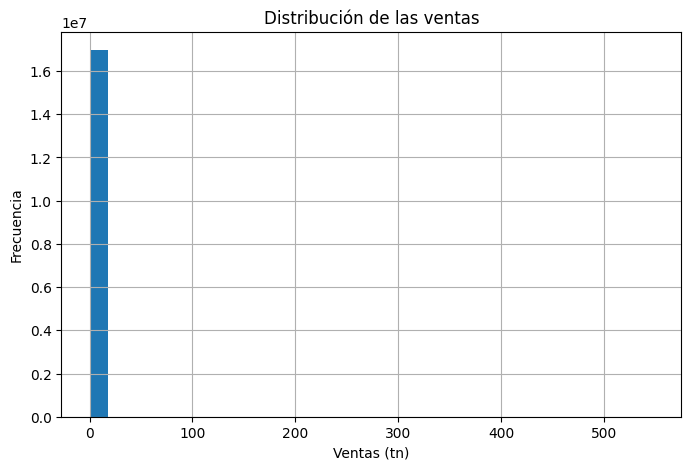

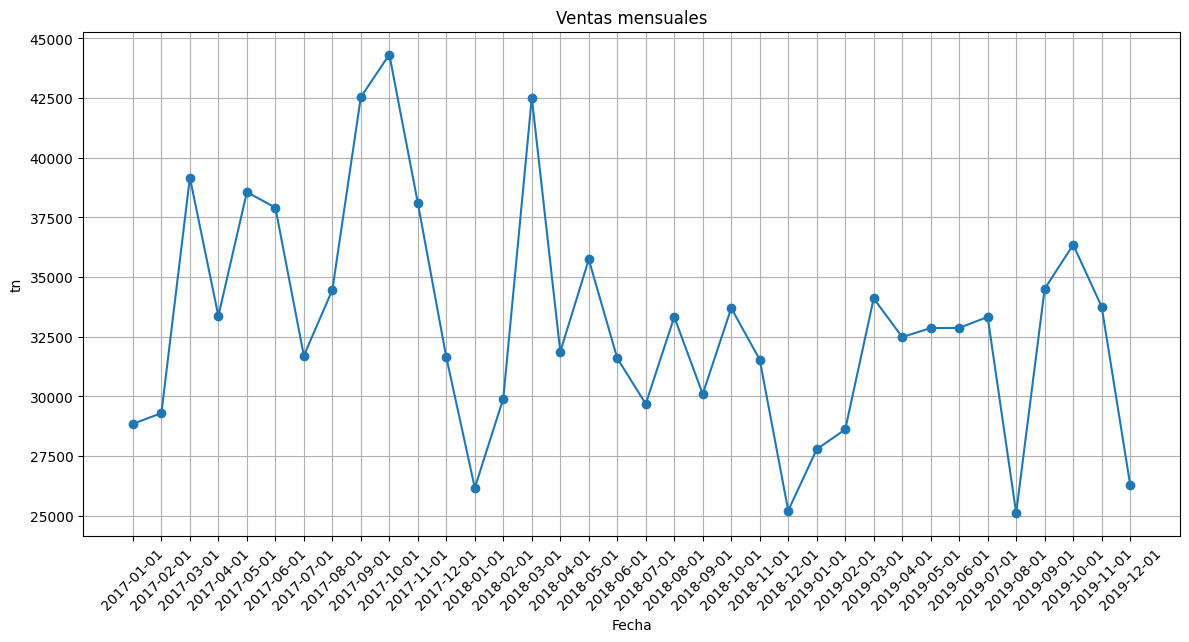

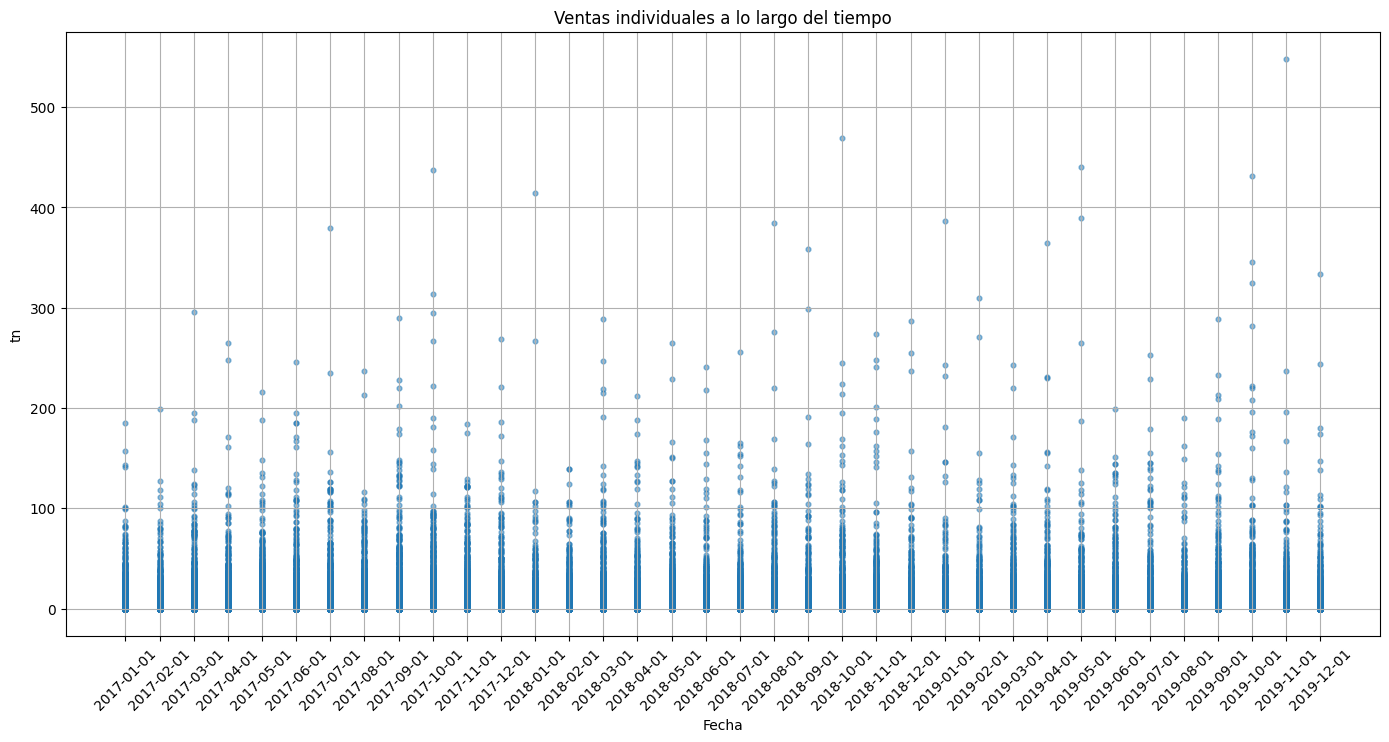

In [46]:
import matplotlib.pyplot as plt

# Distribución de las ventas (histograma)
df['tn'].hist(bins=30, figsize=(8,5))
plt.title("Distribución de las ventas")
plt.xlabel("Ventas (tn)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

# Evolución en el tiempo: agrupar por período y sumar ventas
ventas_por_periodo = df.groupby('periodo')['tn'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(ventas_por_periodo['periodo'], ventas_por_periodo['tn'], marker='o')
plt.title("Ventas mensuales")
plt.xlabel("Fecha")
plt.ylabel("tn")
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)  # Mejorá la visualización de fechas en el eje X
plt.show()

plt.figure(figsize=(14,7))
plt.scatter(df['periodo'], df['tn'], alpha=0.5, s=12)  # s es tamaño de punto
plt.title("Ventas individuales a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("tn")
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()
      


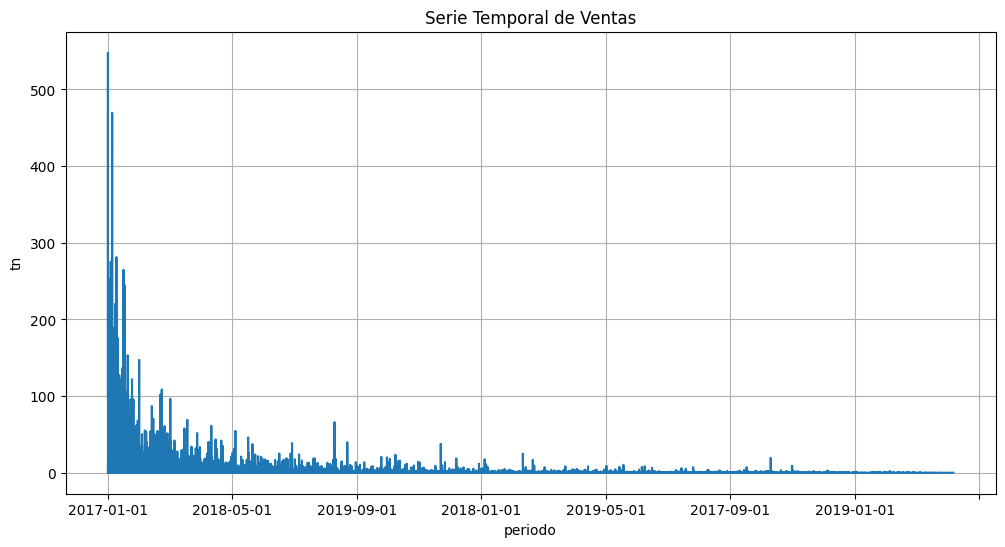

In [47]:
# Si querés ver estacionalidad y tendencia
df_ts = df.set_index('periodo')
df_ts['tn'].plot(figsize=(12,6), title="Serie Temporal de Ventas")
plt.ylabel("tn")
plt.grid(True)
plt.show()


In [48]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="EDA de Ventas", explorative=True)
profile.to_file("eda_ventas.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [03:49<00:00, 17.69s/it]
c:\Users\waldo\miniconda3\envs\nuevito\Lib\site-packages\matplotlib\image.py:180: UserWarning:

Data with more than 2**24 rows cannot be accurately displayed. Downsampling to less than 2**24 rows before displaying. To remove this warning, manually downsample your data.



Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [49]:
# Ver tipos de datos detectados
print(df.dtypes)

# O más detallado
for col in df.columns:
    print(f"{col}: {df[col].dtype}, únicos: {df[col].nunique()}")


customer_id                int64
product_id                 int64
periodo                   object
plan_precios_cuidados    float64
cust_request_qty         float64
cust_request_tn          float64
tn                       float64
stock_final              float64
cat1                      object
cat2                      object
cat3                      object
brand                     object
sku_size                   int64
dtype: object
customer_id: int64, únicos: 597
product_id: int64, únicos: 780
periodo: object, únicos: 36
plan_precios_cuidados: float64, únicos: 2
cust_request_qty: float64, únicos: 85
cust_request_tn: float64, únicos: 92002
tn: float64, únicos: 91943
stock_final: float64, únicos: 10047
cat1: object, únicos: 4
cat2: object, únicos: 15
cat3: object, únicos: 84
brand: object, únicos: 35
sku_size: int64, únicos: 67


In [50]:
# Aseguramos tener la fecha como datetime
#df['periodo'] = pd.to_datetime(df['periodo'])

# Agrupamos: ventas por producto y mes
df_prod = df.groupby(['periodo', 'product_id'])['tn'].sum().reset_index()


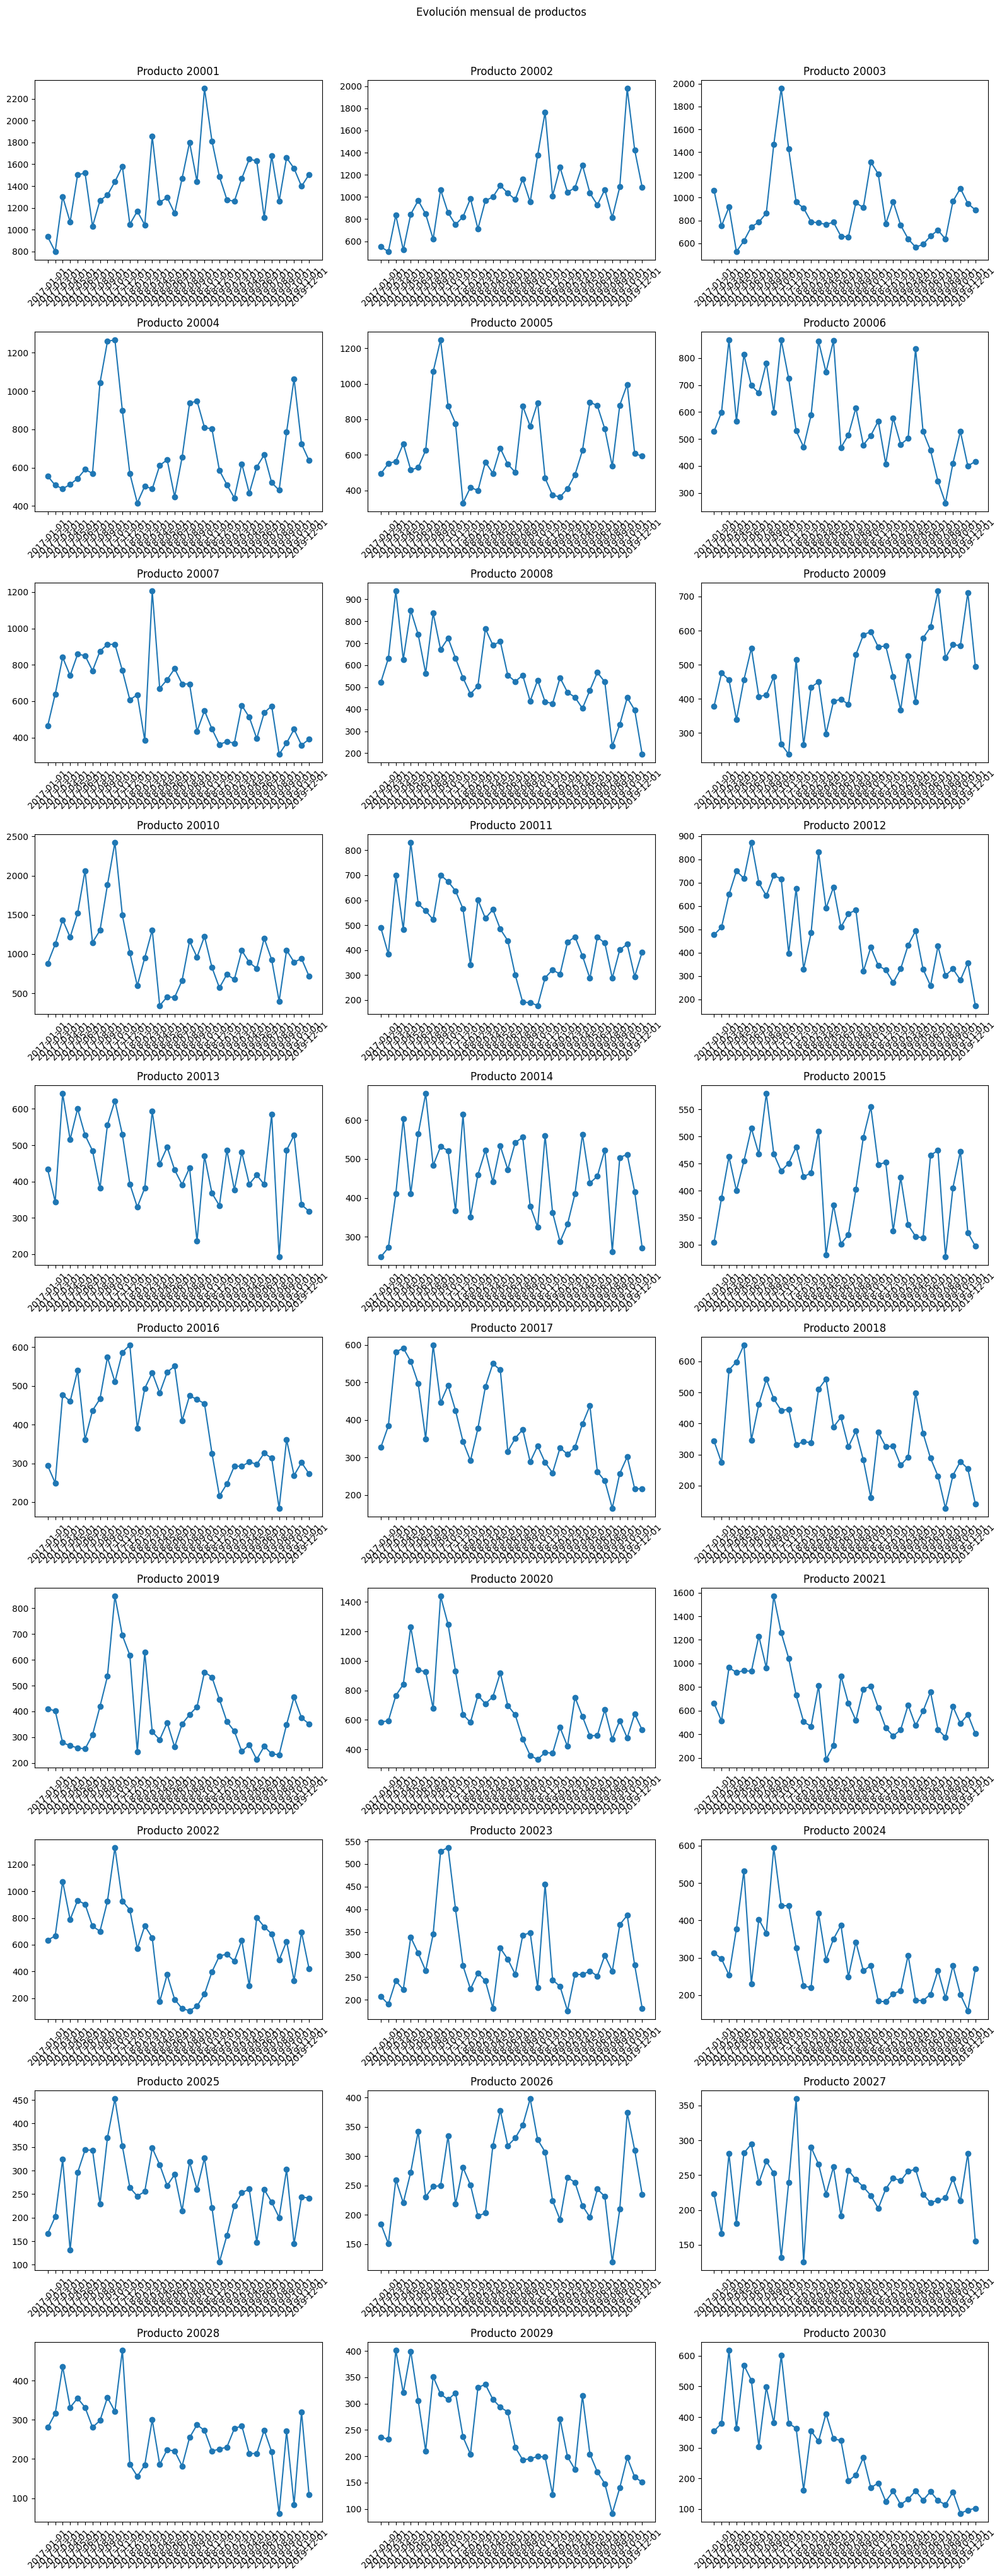

In [51]:
productos = df_prod['product_id'].unique()

# Creamos una figura grande
plt.figure(figsize=(16, 40))

for i, prod in enumerate(productos[:30]):  # Mostramos los primeros 30
    plt.subplot(10, 3, i+1)
    datos = df_prod[df_prod['product_id'] == prod]
    plt.plot(datos['periodo'], datos['tn'], marker='o')
    plt.title(f'Producto {prod}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.suptitle('Evolución mensual de productos', y=1.02)
plt.show()


In [53]:
import pandas as pd
import plotly.express as px

# 1. Agrupás por mes y producto
df_prod = df.groupby(['periodo', 'product_id'])['tn'].sum().reset_index()

# 2. Elegís los 10 productos con más ventas totales
top = df_prod.groupby('product_id')['tn'].sum().sort_values(ascending=False).head(10)
top_productos = top.index.astype(str)  # Convertí a string por si acaso

print("Top 10 productos:", top_productos.tolist())

# 3. Filtrás solo esos productos
df_top = df_prod[df_prod['product_id'].astype(str).isin(top_productos)].copy()
df_top['product_id'] = df_top['product_id'].astype(str)

print("Cantidad de filas en df_top:", len(df_top))
print("Productos únicos en df_top:", df_top['product_id'].unique())

# 4. Graficás con Plotly
fig = px.line(
    df_top,
    x='periodo',
    y='tn',
    color='product_id',
    markers=True,
    title='Evolución mensual de los 10 productos más vendidos',
    labels={'tn': 'Ventas (tn)', 'periodo': 'Fecha', 'product_id': 'Producto'},
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.write_html("grafico_productos_colores.html")
fig.show()


Top 10 productos: ['20001', '20010', '20002', '20003', '20021', '20020', '20004', '20005', '20007', '20022']
Cantidad de filas en df_top: 360
Productos únicos en df_top: ['20001' '20002' '20003' '20004' '20005' '20007' '20010' '20020' '20021'
 '20022']


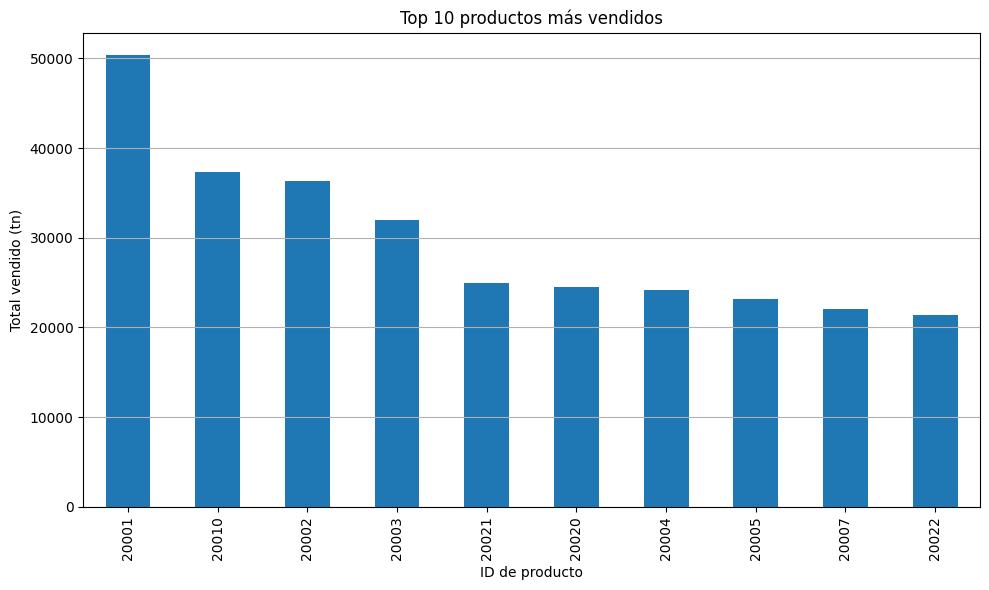

In [54]:
import matplotlib.pyplot as plt

top = df.groupby('product_id')['tn'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top.plot(kind='bar')
plt.title("Top 10 productos más vendidos")
plt.xlabel("ID de producto")
plt.ylabel("Total vendido (tn)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [55]:
top = df.groupby('product_id')['tn'].sum().sort_values(ascending=False).head(10)
print(top)
# Gráfico de los 10 productos más vendidos
plt.figure(figsize=(10, 6))

product_id
20001    50340.39558
20010    37342.15836
20002    36337.25439
20003    32004.15274
20021    25003.78252
20020    24516.78008
20004    24178.15379
20005    23191.21852
20007    22018.45234
20022    21387.99848
Name: tn, dtype: float64


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [56]:
productos_interes = [101, 202, 303]
df_top = df_prod[df_prod['product_id'].isin(productos_interes)]


In [57]:
print(df_prod['product_id'].unique())


[20001 20002 20003 20004 20005 20006 20007 20008 20009 20010 20011 20012
 20013 20014 20015 20016 20017 20018 20019 20020 20021 20022 20023 20024
 20025 20026 20027 20028 20029 20030 20031 20032 20033 20035 20037 20038
 20039 20041 20042 20043 20044 20045 20046 20047 20049 20050 20051 20052
 20053 20054 20055 20056 20057 20058 20059 20061 20062 20063 20065 20066
 20067 20068 20069 20070 20071 20072 20073 20074 20075 20076 20077 20079
 20080 20081 20082 20084 20085 20086 20087 20089 20090 20091 20092 20093
 20094 20095 20096 20097 20099 20100 20101 20102 20103 20106 20107 20108
 20109 20111 20112 20114 20116 20117 20118 20119 20120 20121 20122 20123
 20124 20125 20126 20127 20129 20130 20132 20133 20134 20135 20137 20138
 20139 20140 20142 20143 20144 20145 20146 20148 20150 20151 20152 20153
 20155 20157 20158 20159 20160 20161 20162 20164 20166 20167 20168 20170
 20174 20175 20176 20177 20179 20180 20181 20182 20183 20184 20187 20188
 20189 20192 20193 20196 20197 20198 20200 20201 20

In [58]:
top_ids = df_prod.groupby('product_id')['tn'].sum().sort_values(ascending=False).head(50)
print(top_ids)


product_id
20001    50340.39558
20010    37342.15836
20002    36337.25439
20003    32004.15274
20021    25003.78252
20020    24516.78008
20004    24178.15379
20005    23191.21852
20007    22018.45234
20022    21387.99848
20006    21088.76007
20008    19948.29352
20012    17813.59935
20009    16891.02429
20014    16177.73435
20011    16085.40570
20013    15940.34442
20015    14830.36374
20016    14351.40252
20019    13766.52294
20017    13495.98843
20018    13178.80857
20037    12243.97840
20024    10638.71172
20023    10435.28850
20030     9922.96760
20026     9443.21426
20025     9316.91124
20028     9242.00550
20029     8748.07878
20031     8598.56508
20027     8423.79566
20033     7853.38008
20035     7687.63028
20100     7209.22612
20038     7079.26962
20041     6889.88499
20043     6751.61737
20032     6493.67026
20039     6490.58203
20045     6354.63425
20052     6250.85557
20046     6249.95486
20047     6209.98988
20051     6162.17471
20049     6146.87907
20044     6142.55226
20

In [59]:
productos_interes = top_ids.index.tolist()
df_top = df_prod[df_prod['product_id'].isin(productos_interes)]


In [60]:
df['periodo'] = pd.to_datetime(df['periodo'])

# Agrupar por mes y flag del plan
df_plan = df.groupby(['periodo', 'plan_precios_cuidados'])['tn'].sum().reset_index()

# Traducimos 0/1 a etiquetas más legibles
df_plan['plan'] = df_plan['plan_precios_cuidados'].map({0: 'Fuera del plan', 1: 'En el plan'})


In [61]:
import plotly.express as px

df_plan['plan'] = df_plan['plan'].astype(str)  # Asegurá tipo string

fig = px.line(
    df_plan,
    x='periodo',
    y='tn',
    color='plan',
    markers=True,
    title='Evolución mensual de ventas - Precios Cuidados vs. No Cuidados',
    labels={'tn': 'Ventas (tn)', 'periodo': 'Fecha', 'plan': 'Categoría'},
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.update_layout(
    xaxis=dict(title='Mes'),
    yaxis=dict(title='Toneladas'),
    hovermode='x unified'
)

fig.show()



In [47]:
%pip install streamlit


  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached GitPython-3.1.44-py3-none-any.whl.metadata (13 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached gitdb-4.0.12-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.2-py3-none-any.whl.metadata (4.3 kB)
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.9 MB 3.4 MB/s eta 0:00:03
   ----- ---------------------------------- 1.3/9.9 MB 3.9 MB/s eta 0:00:03
   ----- ---------------------------------- 1.3/9.9 MB 3.9 MB/s eta 0:00:03
   ------ --------------------------------- 1.6/9.9 MB 1.8 MB/s eta 0:00:05
   ------- -------------------------------- 1.8/9.9 MB 1.9 MB/s eta 0:00:05
   ------- -------------------------------- 1.8/9.9 MB 1.9 MB/s eta 0:00:05
   -------- ------------------------------- 2.1/9.9 MB 1.5 MB/s eta 0:00:06
   --------- ------------------------------ 2.4/9.9 MB 1.3 MB/s eta 0:00:06

In [21]:
# app.py
import streamlit as st


# Leé y procesá tus datos
df['periodo'] = pd.to_datetime(df['periodo'])
df_prod = df.groupby(['periodo', 'product_id'])['tn'].sum().reset_index()

# Sidebar con selección de producto
productos = df_prod['product_id'].unique()
producto_sel = st.selectbox("Seleccioná un producto", productos)

# Filtrar y graficar
df_sel = df_prod[df_prod['product_id'] == producto_sel]
fig = px.line(df_sel, x='periodo', y='tn', title=f'Evolución producto {producto_sel}')
st.plotly_chart(fig)


2025-06-01 12:15:11.433 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-01 12:15:11.434 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-01 12:15:11.437 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-01 12:15:11.437 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-01 12:15:11.439 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2025-06-01 12:15:11.439 WARNING streamlit.runtime.scriptrunner_utils.script_run_c

DeltaGenerator()

ACÁ VA LA SEGUNDA PARTE, QUE EN REALIDAD ES UNA EXPLORACIÓN PRELIMINAR DEL DATASET

In [22]:


# Leer el dataset original
df = pd.read_csv('sell-in.txt', sep='\t')
df['periodo'] = pd.to_datetime(df['periodo'], format='%Y%m')

# Agrupación por mes y producto
df_prod = df.groupby(['periodo', 'product_id'])['tn'].sum().reset_index()

# Sidebar con selección de producto
productos = sorted(df_prod['product_id'].unique())
producto_sel = st.selectbox("Seleccioná un producto", productos)

# Filtrar y graficar
df_sel = df_prod[df_prod['product_id'] == producto_sel]
fig = px.line(df_sel, x='periodo', y='tn', title=f'Evolución producto {producto_sel}', markers=True)

st.plotly_chart(fig, use_container_width=True)


2025-06-01 12:15:26.802 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-01 12:15:26.804 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-01 12:15:26.806 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-01 12:15:26.807 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-01 12:15:26.808 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-01 12:15:26.810 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-01 12:15:26.852 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-01 12:15:26.854 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [23]:
df_series = pd.pivot_table(df,index=["periodo",],columns=["product_id"],values=["tn"],aggfunc="sum",fill_value=0)
df_series.reset_index(inplace=True)
df_series.columns = df_series.columns.map(lambda x: x[1] if x[0] == "tn" else x[0])
df_series

,periodo,20001,20002,20003,20004,20005,20006,20007,20008,20009,...,21290,21291,21292,21293,21294,21295,21296,21297,21298,21299
0,2017-01-01,934.77222,550.15707,1063.45835,555.91614,494.27011,528.40996,464.67137,523.04609,378.08172,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00699,0.00000,0.00579,0.00000,0.00000
1,2017-02-01,798.01620,505.88633,752.11520,508.20044,551.43060,599.18590,638.62996,631.71430,475.24200,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,2017-03-01,1303.35771,834.73521,917.16548,489.91328,563.89955,868.34182,840.83303,937.42393,456.07282,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,2017-04-01,1069.96130,522.35365,525.82591,512.05402,662.59032,565.31925,741.17156,626.51768,338.71860,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,2017-05-01,1502.20132,843.43785,620.48202,543.36670,515.58711,813.17643,858.04498,849.48973,455.37110,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
5,2017-06-01,1520.06539,968.15756,744.08829,590.50779,528.58883,698.31833,850.75738,739.24267,548.52156,...,0.00384,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
6,2017-07-01,1030.67391,845.39319,785.12398,569.88117,625.84925,670.77751,767.23749,563.83449,406.51810,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
7,2017-08-01,1267.39462,619.71078,864.21928,1042.52979,1068.01865,781.41139,874.86774,837.31906,411.07364,...,0.00790,0.01092,0.00983,0.00917,0.00764,0.00000,0.00651,0.00000,0.00573,0.00546
8,2017-09-01,1316.94604,1065.34529,1465.83347,1259.64560,1247.88880,599.26956,912.11320,671.24800,464.70505,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
9,2017-10-01,1439.75563,857.45269,1958.59845,1268.21209,875.13411,866.99297,912.87207,723.19292,266.72003,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [24]:
productos_con_mov = list(
    df_series.columns[1:][df_series.iloc[-1, 1:] > 0.51]
)
productos_con_mov = sorted(productos_con_mov)
productos_con_mov

[20001,
 20002,
 20003,
 20004,
 20005,
 20006,
 20007,
 20008,
 20009,
 20010,
 20011,
 20012,
 20013,
 20014,
 20015,
 20016,
 20017,
 20018,
 20019,
 20020,
 20021,
 20022,
 20023,
 20024,
 20025,
 20026,
 20027,
 20028,
 20029,
 20030,
 20031,
 20032,
 20033,
 20035,
 20037,
 20038,
 20039,
 20041,
 20042,
 20043,
 20044,
 20045,
 20046,
 20047,
 20048,
 20049,
 20050,
 20051,
 20052,
 20053,
 20054,
 20055,
 20056,
 20057,
 20058,
 20059,
 20061,
 20062,
 20063,
 20065,
 20066,
 20067,
 20068,
 20069,
 20070,
 20071,
 20072,
 20073,
 20074,
 20075,
 20076,
 20077,
 20078,
 20079,
 20080,
 20081,
 20082,
 20084,
 20085,
 20086,
 20087,
 20088,
 20089,
 20090,
 20091,
 20092,
 20093,
 20094,
 20095,
 20096,
 20097,
 20099,
 20100,
 20101,
 20102,
 20103,
 20105,
 20106,
 20107,
 20108,
 20109,
 20111,
 20112,
 20113,
 20114,
 20116,
 20117,
 20118,
 20119,
 20120,
 20121,
 20122,
 20123,
 20124,
 20125,
 20126,
 20127,
 20128,
 20129,
 20130,
 20132,
 20133,
 20134,
 20135,
 20137,


In [25]:
# Asegurar ventas positivas
ventas = df[df['tn'] > 0].copy()

# Calcular cuántos meses únicos con ventas tuvo cada producto
historial = (
    ventas.groupby('product_id')['periodo']
    .nunique()
    .reset_index(name='meses_con_ventas')
)

# Definir el total de meses del histórico disponible
total_meses = df['periodo'].nunique()

# Filtrar productos que:
# - tienen más de 3 meses con ventas
# - tienen el total de meses esperados (por ejemplo 36)
productos_estables = historial[historial['meses_con_ventas'] >= 24]['product_id'].tolist()

# Filtrar el DataFrame original para esos productos
df_productos_estables = df[df['product_id'].isin(productos_estables)]

print(f"🔎 Se encontraron {len(productos_estables)} productos estables (vendidos todos los meses del histórico).")

🔎 Se encontraron 780 productos estables (vendidos todos los meses del histórico).


In [34]:
# Paso 1: Leer los product_id del archivo txt y convertir a str
with open("product_id_apredecir201912.txt", "r") as f:
    productos_a_predecir = set(str(line.strip()) for line in f if line.strip())

# Paso 2: Convertir productos_estables a set de str para comparar
productos_estables_set = set(str(pid) for pid in productos_estables)

# Paso 3: Intersección (los que están en ambos)
productos_comunes = productos_estables_set & productos_a_predecir

# Paso 4: Solo en estables
solo_estables = productos_estables_set - productos_a_predecir

# Paso 5: Solo en el archivo a predecir
solo_apredecir = productos_a_predecir - productos_estables_set

print(f"Total productos estables: {len(productos_estables_set)}")
print(f"Total productos a predecir: {len(productos_a_predecir)}")
print(f"Coinciden en ambos: {len(productos_comunes)}")
print(f"Solo en estables: {len(solo_estables)}")
print(f"Solo en product_id_apredecir201912.txt: {len(solo_apredecir)}")

# Si querés ver cuáles son, descomentá:
# print("Productos comunes:", productos_comunes)
print("Solo en estables:", solo_estables)
print("Solo en a_predecir:", solo_apredecir)


Total productos estables: 780
Total productos a predecir: 781
Coinciden en ambos: 568
Solo en estables: 212
Solo en product_id_apredecir201912.txt: 213
Solo en estables: {'20105', '20113', '20943', '20805', '20467', '20794', '20397', '20064', '20778', '21113', '20445', '20369', '20804', '20825', '20461', '20156', '21021', '20374', '20048', '20190', '20898', '21070', '20371', '20511', '20790', '20546', '21255', '21185', '20939', '20217', '20960', '20595', '21036', '20131', '20454', '20796', '20874', '21067', '20435', '20543', '20489', '20873', '20848', '20493', '20665', '21030', '20441', '20974', '20887', '20710', '21047', '20439', '20930', '20587', '20412', '20977', '20413', '20078', '20475', '20394', '20393', '20669', '20839', '21062', '21005', '20141', '20635', '20194', '21195', '20287', '20598', '20755', '20191', '20722', '20185', '20648', '20590', '20850', '20814', '20243', '20399', '20989', '20516', '21019', '20725', '20492', '20891', '21050', '20860', '20506', '20656', '20154', '

In [36]:
import pandas as pd

# Leer los product_id del archivo txt y convertir a str
with open("product_id_apredecir201912.txt", "r") as f:
    productos_a_predecir = set(str(line.strip()) for line in f if line.strip())

# Convertir productos_estables a set de str para comparar
productos_estables_set = set(str(pid) for pid in productos_estables)

# Intersección (los que están en ambos)
productos_comunes = productos_estables_set & productos_a_predecir

# Solo en estables
solo_estables = productos_estables_set - productos_a_predecir

# Solo en el archivo a predecir
solo_apredecir = productos_a_predecir - productos_estables_set

# Imprimir resultados
print(f"Total productos estables: {len(productos_estables_set)}")
print(f"Total productos a predecir: {len(productos_a_predecir)}")
print(f"Coinciden en ambos: {len(productos_comunes)}")
print(f"Solo en estables: {len(solo_estables)}")
print(f"Solo en product_id_apredecir201912.txt: {len(solo_apredecir)}")

# Imprimir todos los IDs, uno por línea
print("\nSolo en estables:")
for pid in sorted(solo_estables):
    print(pid)

print("\nSolo en a_predecir:")
for pid in sorted(solo_apredecir):
    print(pid)

# Exportar ambos a un solo Excel con dos columnas
solo_estables_list = sorted(list(solo_estables))
solo_apredecir_list = sorted(list(solo_apredecir))

df_diferencias = pd.DataFrame({
    'solo_estables': pd.Series(solo_estables_list),
    'solo_a_predecir': pd.Series(solo_apredecir_list)
})

df_diferencias.to_excel("diferencias_productos.xlsx", index=False)

print("✅ Exportado a diferencias_productos.xlsx con ambas columnas")


Total productos estables: 780
Total productos a predecir: 781
Coinciden en ambos: 568
Solo en estables: 212
Solo en product_id_apredecir201912.txt: 213

Solo en estables:
20034
20036
20040
20048
20060
20064
20078
20083
20088
20105
20113
20115
20128
20131
20136
20141
20147
20149
20154
20156
20163
20165
20169
20171
20173
20178
20185
20190
20191
20194
20195
20214
20217
20221
20243
20248
20250
20274
20287
20293
20308
20312
20318
20345
20360
20363
20369
20370
20371
20373
20374
20376
20391
20393
20394
20397
20399
20405
20412
20413
20420
20423
20425
20427
20430
20431
20435
20439
20441
20444
20445
20446
20448
20452
20454
20457
20461
20462
20467
20471
20472
20475
20485
20486
20489
20492
20493
20494
20499
20501
20504
20506
20507
20511
20512
20516
20528
20529
20533
20534
20535
20543
20546
20554
20556
20564
20566
20573
20582
20587
20590
20594
20595
20598
20607
20608
20618
20625
20630
20635
20645
20648
20650
20656
20665
20669
20683
20698
20710
20716
20718
20722
20725
20752
20755
20776
20778
20780
2

Como no coinciden, preparamos el dataset en base a los productos a predecir suministrados por la cátedra


In [134]:
# 1. Leer los IDs a filtrar (a string, por las dudas)
with open("product_id_apredecir201912.txt", "r") as f:
    productos_a_filtrar = set(str(line.strip()) for line in f if line.strip())

# 2. Leer el dataset principal (ajustá el sep según corresponda: ',' para CSV, '\t' para tabulado)
# Si no sabés, abrilo con un editor de texto y fijate el separador.
df = pd.read_csv("datos_finales.txt", sep="\t")  # Cambiá a sep="\t" si es TSV

# 3. Filtrar el DataFrame según los IDs
df_filtrado = df[df['product_id'].astype(str).isin(productos_a_filtrar)].copy()

# 4. Exportar a CSV
df_filtrado.to_csv("datos_filtrados.csv", index=False)

print("✅ Exportado a datos_filtrados.csv solo con los product_id seleccionados.")


✅ Exportado a datos_filtrados.csv solo con los product_id seleccionados.


In [135]:
print(df_filtrado.head())      # Muestra las primeras 5 filas
print(df_filtrado.head(10))   # Muestra las primeras 10 filas


      periodo  customer_id  product_id  plan_precios_cuidados  \
0  2017-01-01        10234       20524                      0   
1  2017-01-01        10032       20524                      0   
2  2017-01-01        10217       20524                      0   
3  2017-01-01        10125       20524                      0   
4  2017-01-01        10012       20524                      0   

   cust_request_qty  cust_request_tn       tn cat1     cat2        cat3  \
0                 2          0.05300  0.05300   HC  VAJILLA  Cristalino   
1                 1          0.13628  0.13628   HC  VAJILLA  Cristalino   
2                 1          0.03028  0.03028   HC  VAJILLA  Cristalino   
3                 1          0.02271  0.02271   HC  VAJILLA  Cristalino   
4                11          1.54452  1.54452   HC  VAJILLA  Cristalino   

       brand  sku_size  stock_final  
0  Importado     500.0          NaN  
1  Importado     500.0          NaN  
2  Importado     500.0          NaN  
3  Imp

In [136]:
print(df_filtrado.tail())      # Últimas 5 filas


            periodo  customer_id  product_id  plan_precios_cuidados  \
2988645  2019-12-01        10105       20853                      0   
2988646  2019-12-01        10092       20853                      0   
2988647  2019-12-01        10006       20853                      0   
2988648  2019-12-01        10018       20853                      0   
2988649  2019-12-01        10020       20853                      0   

         cust_request_qty  cust_request_tn       tn cat1     cat2  \
2988645                 1          0.02230  0.02230   PC  CABELLO   
2988646                 1          0.00669  0.00669   PC  CABELLO   
2988647                 7          0.02898  0.02898   PC  CABELLO   
2988648                 4          0.01561  0.01561   PC  CABELLO   
2988649                 2          0.01561  0.01561   PC  CABELLO   

                 cat3  brand  sku_size  stock_final  
2988645  Shampoo Bebe  NIVEA     200.0      1.82373  
2988646  Shampoo Bebe  NIVEA     200.0      1.8237

In [137]:
print(df_filtrado.shape)       # (filas, columnas)
print(df_filtrado.columns)     # Lista los nombres de columnas


(2332211, 13)
Index(['periodo', 'customer_id', 'product_id', 'plan_precios_cuidados',
       'cust_request_qty', 'cust_request_tn', 'tn', 'cat1', 'cat2', 'cat3',
       'brand', 'sku_size', 'stock_final'],
      dtype='object')


In [138]:
print(df_filtrado.info())


<class 'pandas.core.frame.DataFrame'>
Index: 2332211 entries, 0 to 2988649
Data columns (total 13 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   periodo                object 
 1   customer_id            int64  
 2   product_id             int64  
 3   plan_precios_cuidados  int64  
 4   cust_request_qty       int64  
 5   cust_request_tn        float64
 6   tn                     float64
 7   cat1                   object 
 8   cat2                   object 
 9   cat3                   object 
 10  brand                  object 
 11  sku_size               float64
 12  stock_final            float64
dtypes: float64(4), int64(4), object(5)
memory usage: 249.1+ MB
None


In [139]:
print(df_filtrado.describe())


        customer_id    product_id  plan_precios_cuidados  cust_request_qty  \
count  2.332211e+06  2.332211e+06           2.332211e+06      2.332211e+06   
mean   1.017257e+04  2.038488e+04           1.197576e-02      2.171542e+00   
std    1.421435e+02  3.012938e+02           1.087766e-01      3.666393e+00   
min    1.000100e+04  2.000100e+04           0.000000e+00      1.000000e+00   
25%    1.005500e+04  2.012600e+04           0.000000e+00      1.000000e+00   
50%    1.013500e+04  2.031600e+04           0.000000e+00      1.000000e+00   
75%    1.026900e+04  2.060100e+04           0.000000e+00      2.000000e+00   
max    1.063700e+04  2.127600e+04           1.000000e+00      9.200000e+01   

       cust_request_tn            tn      sku_size    stock_final  
count     2.332211e+06  2.332211e+06  2.332211e+06  984711.000000  
mean      5.216651e-01  5.099546e-01  4.145647e+02      28.420299  
std       3.582281e+00  3.452151e+00  6.733014e+02      78.845498  
min       1.000000e-04  1

In [140]:
#print(df_filtrado['product_id'].unique())
print(df_filtrado['product_id'].nunique())  # Cantidad de IDs únicos
print(df_filtrado.isnull().sum())  # Chequea nulos por columna

780
periodo                        0
customer_id                    0
product_id                     0
plan_precios_cuidados          0
cust_request_qty               0
cust_request_tn                0
tn                             0
cat1                           0
cat2                           0
cat3                           0
brand                          0
sku_size                       0
stock_final              1347500
dtype: int64


In [141]:
df_filtrado
# Verificar si hay duplicados
print(df_filtrado.duplicated().sum())  # Cantidad de filas duplicadas

33105


In [62]:
df
# Verificar si hay duplicados
print(df.duplicated().sum())  # Cantidad de filas duplicadas

171936


In [142]:
print(df_filtrado.sample(10))   # 10 filas aleatorias
print(df_filtrado['tn'].sum())  # Suma total de toneladas
print(df_filtrado['tn'].mean())  # Promedio de toneladas

            periodo  customer_id  product_id  plan_precios_cuidados  \
2288073  2019-03-01        10239       21118                      0   
1755002  2018-08-01        10087       20459                      0   
1827177  2018-09-01        10067       20348                      0   
403219   2017-05-01        10405       20551                      0   
633387   2017-08-01        10204       20029                      0   
2489822  2019-06-01        10002       20327                      0   
2967735  2019-12-01        10049       20155                      0   
2343967  2019-04-01        10006       20182                      0   
1902452  2018-10-01        10158       20340                      0   
175033   2017-03-01        10044       20076                      0   

         cust_request_qty  cust_request_tn       tn   cat1      cat2  \
2288073                 1          0.00105  0.00105     PC    DENTAL   
1755002                 1          0.01267  0.01267  FOODS  ADEREZOS   
18

In [143]:
df_filtrado = df_filtrado.fillna(0)
# Verificar nuevamente si hay nulos
print(df_filtrado.isnull().sum())  # Debería mostrar 0 en todas las columnas

periodo                  0
customer_id              0
product_id               0
plan_precios_cuidados    0
cust_request_qty         0
cust_request_tn          0
tn                       0
cat1                     0
cat2                     0
cat3                     0
brand                    0
sku_size                 0
stock_final              0
dtype: int64


In [144]:
df_filtrado

,periodo,customer_id,product_id,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn,cat1,cat2,cat3,brand,sku_size,stock_final
0,2017-01-01,10234,20524,0,2,0.05300,0.05300,HC,VAJILLA,Cristalino,Importado,500.0,0.00000
1,2017-01-01,10032,20524,0,1,0.13628,0.13628,HC,VAJILLA,Cristalino,Importado,500.0,0.00000
2,2017-01-01,10217,20524,0,1,0.03028,0.03028,HC,VAJILLA,Cristalino,Importado,500.0,0.00000
3,2017-01-01,10125,20524,0,1,0.02271,0.02271,HC,VAJILLA,Cristalino,Importado,500.0,0.00000
4,2017-01-01,10012,20524,0,11,1.54452,1.54452,HC,VAJILLA,Cristalino,Importado,500.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988645,2019-12-01,10105,20853,0,1,0.02230,0.02230,PC,CABELLO,Shampoo Bebe,NIVEA,200.0,1.82373
2988646,2019-12-01,10092,20853,0,1,0.00669,0.00669,PC,CABELLO,Shampoo Bebe,NIVEA,200.0,1.82373
2988647,2019-12-01,10006,20853,0,7,0.02898,0.02898,PC,CABELLO,Shampoo Bebe,NIVEA,200.0,1.82373
2988648,2019-12-01,10018,20853,0,4,0.01561,0.01561,PC,CABELLO,Shampoo Bebe,NIVEA,200.0,1.82373


ACÁ VOLVEMOS A RETOMAR PORQUE TRABAJAMOS LOS DUPLICADOS

In [63]:
# Ver cuántas filas están duplicadas según product_id, periodo y customer_id
duplicados_reales = df.duplicated(subset=['product_id', 'periodo', 'customer_id'], keep=False)

# Mostrar cuántos hay
print("Cantidad de duplicados según las tres columnas:", duplicados_reales.sum())

# Ver una muestra de esas filas
print(df[duplicados_reales].head(10))


Cantidad de duplicados según las tres columnas: 429840
     customer_id  product_id    periodo  plan_precios_cuidados  \
324        10001       20010 2017-01-01                    0.0   
325        10001       20010 2017-01-01                    0.0   
326        10001       20010 2017-02-01                    0.0   
327        10001       20010 2017-02-01                    0.0   
328        10001       20010 2017-03-01                    0.0   
329        10001       20010 2017-03-01                    0.0   
330        10001       20010 2017-04-01                    0.0   
331        10001       20010 2017-04-01                    0.0   
332        10001       20010 2017-05-01                    0.0   
333        10001       20010 2017-05-01                    0.0   

     cust_request_qty  cust_request_tn       tn  stock_final cat1  \
324               3.0          1.31914  1.31914          0.0   HC   
325               3.0          1.31914  1.31914          0.0   HC   
326        

In [64]:
# Contar cuántas veces aparece cada trío
repetidos = (
    df.groupby(['product_id', 'periodo', 'customer_id'])
    .size()
    .reset_index(name='cuenta')
    .query('cuenta > 1')
)

print(repetidos.head(10))  # Pares más repetidos


        product_id    periodo  customer_id  cuenta
193428       20010 2017-01-01        10001       2
193429       20010 2017-01-01        10002       2
193430       20010 2017-01-01        10003       2
193431       20010 2017-01-01        10004       2
193432       20010 2017-01-01        10005       2
193433       20010 2017-01-01        10006       2
193434       20010 2017-01-01        10007       2
193435       20010 2017-01-01        10008       2
193436       20010 2017-01-01        10009       2
193437       20010 2017-01-01        10010       2


In [65]:
columnas_check = ['product_id', 'periodo', 'customer_id', 'sku_size']

# Duplicados según esas 4 columnas
duplicados_cuatro = df.duplicated(subset=columnas_check, keep=False)

print("Cantidad de duplicados en esas 4 columnas:", duplicados_cuatro.sum())

# Mostrar una muestra
print(df[duplicados_cuatro].head(10))


Cantidad de duplicados en esas 4 columnas: 429840
     customer_id  product_id    periodo  plan_precios_cuidados  \
324        10001       20010 2017-01-01                    0.0   
325        10001       20010 2017-01-01                    0.0   
326        10001       20010 2017-02-01                    0.0   
327        10001       20010 2017-02-01                    0.0   
328        10001       20010 2017-03-01                    0.0   
329        10001       20010 2017-03-01                    0.0   
330        10001       20010 2017-04-01                    0.0   
331        10001       20010 2017-04-01                    0.0   
332        10001       20010 2017-05-01                    0.0   
333        10001       20010 2017-05-01                    0.0   

     cust_request_qty  cust_request_tn       tn  stock_final cat1  \
324               3.0          1.31914  1.31914          0.0   HC   
325               3.0          1.31914  1.31914          0.0   HC   
326             

In [66]:
repetidos = (
    df.groupby(columnas_check)
    .size()
    .reset_index(name='cuenta')
    .query('cuenta > 1')
)
print(repetidos.head(10))  # Muestra los primeros pares que se repiten más de una vez


        product_id    periodo  customer_id  sku_size  cuenta
193428       20010 2017-01-01        10001       400       2
193429       20010 2017-01-01        10002       400       2
193430       20010 2017-01-01        10003       400       2
193431       20010 2017-01-01        10004       400       2
193432       20010 2017-01-01        10005       400       2
193433       20010 2017-01-01        10006       400       2
193434       20010 2017-01-01        10007       400       2
193435       20010 2017-01-01        10008       400       2
193436       20010 2017-01-01        10009       400       2
193437       20010 2017-01-01        10010       400       2


In [67]:
columnas_check = ['product_id', 'periodo', 'customer_id', 'sku_size']

# Borra los duplicados, quedándote solo con la primera aparición de cada combinación
df_sin_duplicados = df.drop_duplicates(subset=columnas_check, keep='first')

# Chequeá que ya no haya duplicados
duplicados_restantes = df_sin_duplicados.duplicated(subset=columnas_check, keep=False).sum()
print(f"Duplicados restantes según esas 4 columnas: {duplicados_restantes}")

# Si querés, guardá el resultado
df_sin_duplicados.to_csv("finalitoul.csv", index=False)
print("✅ Archivo exportado como finalitouol.csv")

print("Filas antes de limpiar:", len(df_sin_duplicados))
print("Filas después de limpiar:", len(df_sin_duplicados))


Duplicados restantes según esas 4 columnas: 0
✅ Archivo exportado como finalitouol.csv
Filas antes de limpiar: 16763760
Filas después de limpiar: 16763760


In [68]:
import pandas as pd

df_final = pd.read_csv("finalitoul.csv")


In [69]:
df_final

,customer_id,product_id,periodo,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn,stock_final,cat1,cat2,cat3,brand,sku_size
0,10001,20001,2017-01-01,0.0,11.0,99.43861,99.43861,0.00000,HC,ROPA LAVADO,Liquido,ARIEL,3000
1,10001,20001,2017-02-01,0.0,23.0,198.84365,198.84365,0.00000,HC,ROPA LAVADO,Liquido,ARIEL,3000
2,10001,20001,2017-03-01,0.0,33.0,92.46537,92.46537,0.00000,HC,ROPA LAVADO,Liquido,ARIEL,3000
3,10001,20001,2017-04-01,0.0,8.0,13.29728,13.29728,0.00000,HC,ROPA LAVADO,Liquido,ARIEL,3000
4,10001,20001,2017-05-01,0.0,15.0,101.20711,101.00563,0.00000,HC,ROPA LAVADO,Liquido,ARIEL,3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16763755,10637,21276,2019-08-01,0.0,0.0,0.00000,0.00000,1.08488,PC,PIEL1,Cara,NIVEA,140
16763756,10637,21276,2019-09-01,0.0,0.0,0.00000,0.00000,0.87622,PC,PIEL1,Cara,NIVEA,140
16763757,10637,21276,2019-10-01,0.0,0.0,0.00000,0.00000,1.05889,PC,PIEL1,Cara,NIVEA,140
16763758,10637,21276,2019-11-01,0.0,0.0,0.00000,0.00000,1.06112,PC,PIEL1,Cara,NIVEA,140


In [70]:
cliente = 10020
periodo = "2019-12-01"

# Filtrá el DataFrame
df_filtrado = df_final[(df_final['customer_id'] == cliente) & (df_final['periodo'] == periodo)]
ventas = df_filtrado['cust_request_qty'].sum()
print(f"El cliente {cliente} en el período {periodo} vendió {ventas} unidades.")
ventas_tn = df_filtrado['cust_request_tn'].sum()
print(f"El cliente {cliente} en el período {periodo} vendió {ventas_tn} toneladas.")


El cliente 10020 en el período 2019-12-01 vendió 1421.0 unidades.
El cliente 10020 en el período 2019-12-01 vendió 206.89439 toneladas.
